In [6]:
!{sys.executable} -m pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 41.5 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 37.1 MB/s eta 0:00:00a 0:00:01
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 18.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.42.1-cp311-cp311-macosx_10_9_universal2.whl (2.7 MB)
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl (66 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [7]:
# Cell 3: Load Data
df = pd.read_csv('awards.csv')


In [9]:
display(df)

,Award ID,Award Amount,Awarding Agency,Funding Agency,Start Date,End Date,Recipient Name
0,ZL05,393347.60,Department of Defense,Department of Defense,2018-03-23,2023-07-31,CELLCO PARTNERSHIP
1,ZL04,84256.12,Department of Defense,Department of Defense,2018-03-20,2023-07-23,CELLCO PARTNERSHIP
2,ZL03,209053.64,Department of Defense,Department of Defense,2018-03-23,2023-07-30,"AT&T MOBILITY NATIONAL ACCOUNTS, LLC"
3,ZL02,47163.34,Department of Defense,Department of Defense,2018-03-22,2023-07-25,"AT&T MOBILITY NATIONAL ACCOUNTS, LLC"
4,ZJ21,586118.00,Department of Defense,Department of Defense,2017-02-28,2022-05-31,BLACK & VEATCH SPECIAL PROJECTS CORP.
...,...,...,...,...,...,...,...
10995,W9124J19F00N3,1465065.50,Department of Defense,Department of Defense,2019-09-26,2021-12-31,PACIFIC GAS AND ELECTRIC COMPANY
10996,W9124J19F00J7,11663311.91,Department of Defense,Department of Defense,2019-09-20,2024-09-30,"CH2M HILL CONSTRUCTORS, INC."
10997,W9124J19F00J1,0.00,Department of Defense,Department of Defense,2019-09-18,2019-11-30,PACIFIC GAS AND ELECTRIC COMPANY
10998,W9124J19F00A4,1896542.00,Department of Defense,Department of Defense,2019-07-26,2024-06-01,"KEMRON ENVIRONMENTAL SERVICES, INC."


In [10]:
# Cell 4: Data Manipulation
# Convert 'Start Date' to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])
# Extract month and year for 'Start Date'
df['Start Month'] = df['Start Date'].dt.to_period('M')
# Extract only the month for 'Start Date'
df['Start Month Only'] = df['Start Date'].dt.month


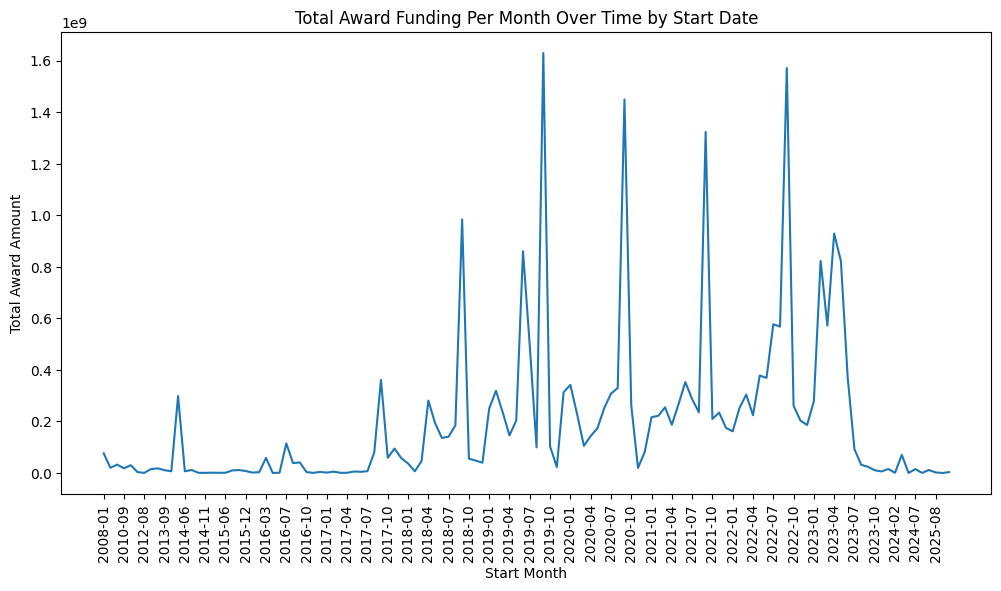

In [14]:
# Cell 5: Plotting - Total award funding per month over time by "Start Date"
monthly_funding = df.groupby('Start Month')['Award Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_funding['Start Month'].astype(str), monthly_funding['Award Amount'])
plt.title('Total Award Funding Per Month Over Time by Start Date')
plt.xlabel('Start Month')
plt.ylabel('Total Award Amount')
plt.xticks(monthly_funding.index[::3], monthly_funding['Start Month'].astype(str)[::3], rotation=90) # set ticks every 3 months
plt.show()


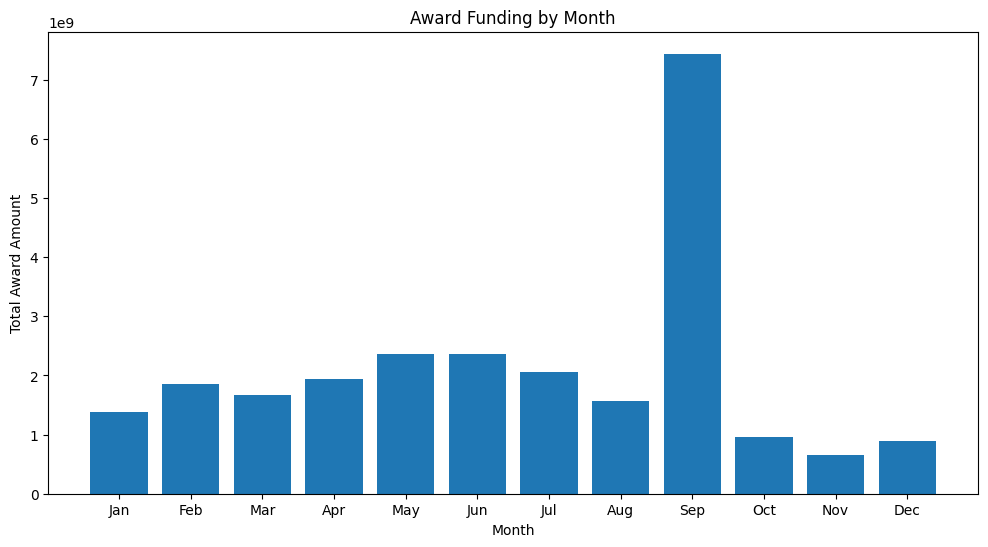

In [12]:
# Cell 6: Plotting - Award funding by month
monthly_funding_only = df.groupby('Start Month Only')['Award Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(monthly_funding_only['Start Month Only'], monthly_funding_only['Award Amount'])
plt.title('Award Funding by Month')
plt.xlabel('Month')
plt.ylabel('Total Award Amount')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
